# La transformada continua Wavelet 
***

### Sinopsis

*__Datos:__ 3 segundos de registro EEG lóbulo occipital muestreados a 500 Hz bajo condiciones de relajación con los ojos cerrados.* <br>
*__Objetivo:__ Conocer, definir e implementar la transformada contínua wavelet para señales no estacionarias.* <br>
*__Herramientas:__ Wavelets, Transformada Contínua Wavelet.* <br>

### Introducción

Cuando se busca realizar algún método de análisis y/o procesamiento de señales, un requisito usual en éstos métodos, tales como la Transformada de Fourier, es la estacionariedad. Ésta característica de ciertas señales describe que a lo largo de la serie de tiempo sus propiedades estadísticas no cambian a lo largodel tiempo, algo que muchas veces o inclusive nunca es logra en señales de orígen biológico como lo es el caso de la electroencefalografía. Por esta razón, en términos prácticos muchas veces se asume la estacionariedad en un término más flexible llamado "estacionariedad en sentido amplio", el cual requiere una media constante y una función de correlación invariante en el tiempo.  Sin embargo, para una señal con media distinta de cero el equivalente para esta condición en el dominio de la frecuencia es que cuente con un espectro invariante en el tiempo. Por este motivo, en la práctica para emplear los métodos de análisis y procesamiento convencionales es necesario implementarlos sobre segmentos de tiempo cortos donde sea posible considerar a la señal como estacionaria estricta o en sentido amplio. La duración  para estos segmentos varía y depende del tipo de señal que se busque analizar, en el caso de resitros de EEG los segmentos pueden ser hasta de 20 segundos de duración (Cassani & Falk, 2019). De aquí surge la necesidad de contar con una representación  capaz de regristrar los cambios en el contenido de la frecuencia a lo largo del tiempo para llevar a cabo un análisis frecuencial sobre señales no estacionarias, es decir, se requiere de la construcción de una representación espectro-temporal la cuál puede ser obtenida mediante distintos métodos como lo son: 
<br>

    - Transformada Corta de Fourier (STFT)
    - Transformada Hilbert  (HT)
    - Transformada Continua Wavelet (CWT)

### Dominio Tiempo y Frecuencia

Un elemento fundamental en el análisis y procesamiento de señales es la capacidad de representar señales en el dominio temporal y frecuencial mediante transformaciones matemáticas reversibles. Si bien existen muchos métodos para realizar estas transformaciones, el más utilizado es la transformada de Fourier y la transformada de Fourier inversa, que realizan la transformación tiempo-a-frecuencia y frecuencia-a-tiempo respectivamente. Matemáticamente se definen como sigue

<script type="text/x-mathjax-config">
MathJax.Hub.Config({
tex2jax: {
inlineMath: [['$','$'], ['\\(','\\)']],
processEscapes: true},
jax: ["input/TeX","input/MathML","input/AsciiMath","output/CommonHTML"],
extensions: ["tex2jax.js","mml2jax.js","asciimath2jax.js","MathMenu.js","MathZoom.js","AssistiveMML.js", "[Contrib]/a11y/accessibility-menu.js"],
TeX: {
extensions: ["AMSmath.js","AMSsymbols.js","noErrors.js","noUndefined.js"],
equationNumbers: {
autoNumber: "AMS"
}
}
});
</script>

<p align="center">
    $$ X(\omega) = \mathcal{F}\{x(t)\} = \frac{1}{\sqrt{2\pi}}\int^{\infty}_{-\infty} x(t) e^{-i2\pi\omega t}dt$$
    <br>
    $$ x(t) = \mathcal{F}^{-1}\{X(\omega)\} =\frac{1}{\sqrt{2\pi}} \int^{\infty}_{-\infty} X(\omega) e^{i2\pi\omega t}d\omega$$
</p>

Donde $\mathcal{F}\{\cdot\}$ y $\mathcal{F}^{-1}\{ \cdot\}$ denotan la transformada de Fourier (TF) y la transformada inversa (TFI) respectivamente; $x(t)$ es la señal en el dominio del tiempo; $X(\omega)$ es una función compleja llamado espectro de $x(t)$ que bien puede escribirse como:

$$X(\omega) = ||X(\omega)||e^{i\theta(\omega)}$$

donde $||X(\omega)||$ es la amplitud espectral con una fase $\theta(\omega)$ asociada. En general, $||X(\omega)||$ representa la amplitud para dada frecuencia $\omega$, con la cual se obtiene una representación usual en el dominio de la frecuencia que es la densidad espectral de energía $||X(\omega)||^2$, la cual muestra la distribución de la energía de la señal para distintas frecuencias; es decir, el área bajo la curva $||X(\omega)||^2$ entre $f_0-df$ y $f_0+df$ representa la energía de la componente $f_0$ en Hz.

Ocurre un caso especial en el caso de TF para funciones $x(t)$ reales, en el cuál su espectro correspondiente presenta simetria Hermitiana, es decir las componentes espectrales para funciones negativas son equivalentes al complejo conjugado de las componentes para frecuencias positivas, es decir:

$$X(\omega) = X^{*}(-f) \Rightarrow ||X(\omega)|| = ||X^{*}(-f)|| $$

Como consecuencia, la representación del espectro de señales reales se realiza solo para frecuencias positivas, por consiguiente para conservar la correcta relación entre componentes frecuenciales y su respectiva amplitud $||X(\omega)||$ y potencia $||X(\omega)||^2$, se deben duplicar los valores. 

Una cualidad importante que es útil y sencilla para corroborar que se realice una correcta transformada de Fourier es mediante la "Relación de Parseval" la cual demuestra que la TF es una operación unitaria, es decir, la integral (o la suma en el caso discreto) del cuadrado de una función es igual a la integral (o suma) del cuadrado de su transformada. Matemáticamente se expresa como:

$$\int_{-\infty}^{\infty} ||x(t)||^2 dt = \int_{-\infty}^{\infty} ||X(\omega)||^2 d\omega$$

O en su versión discreta, donde $X[j]$ representa la TFD de $x[n]$ :

$$\sum^{N-1}_{n=0}|x[n]|^2 = \frac{1}{N}\sum^{N-1}_{n=0} |X[j]|^2 $$
Como ejercicio podemos emplear el código presentado en el módulo "La electroencefalografía" para obtener y graficar la TF y comprobar la Relación Parseval:

##### Importe de paqueterías

In [3]:
import pandas as pd  #Paq. p-manejo de archivos de datos
import scipy as sc  #Paq. p-análisis numérico 
import numpy as np  #Paq. p-cálculo numérico
import matplotlib   #Paq. p-graficación
import matplotlib.pyplot as plt
import os.path as os #Paq. p-despliegue de ruta

##### Importación de los datos

In [4]:
#Una variable para la dirección de nuestros archivos
path = os.abspath('C:/Users/Andrew S/Documents/Trabajo/Fisica Biomedica/8vo/Servicio Social/')
#Asociamos una variable al objeto DataFrame creado apartir del archivo extensión csv
data = pd.read_csv(path +'/Jenny.csv')
EEG = data['meditacion'] #Señal EEG en reposo

##### Relación de Parseval

A continuación realizamos el cálculo de la TF haciendo uso del algoritmo de FFT, posteriormente comprobamos la relación definiendo una función que realice la "integración", es decir la suma de los valores absolutos cuadrados i de la serie.

In [5]:
def Suma (x): #La función recibira una variable de tipo array
    suma = 0 #Definimos el valor inicial de la suma en 0
    for i in range(len(x)): #iniciamos un ciclo for durante el cual se realizará la operación
        suma += abs(x[i])**2 #iterativamente sumamos el valor anterior de la variable más el elemento i del array
    return suma

In [405]:
N = len(EEG)
P1_time = Suma(EEG) #Obtenemos la suma del array 'x^2' y lo asignamos a una nueva variable
P2_frequency = 1/N * Suma(np.fft.fft(EEG)) #Realizamos el procedimiento análogo para el array del dominio de las frecuencias
P1_time // P2_frequency

0.9999999999999999

### Operaciones fundamentales

#### El producto interior

La primera de las operaciones fundamentales que vale la pena revisar, es el producto interior en el espacio de funciones contínuas, cuya definición facilmente puede traspasarse hacia el caso discreto. Podemos entender esta operación como el producto de dadas funciones $f$ y $g^*$, el conjugado de la función $g$, evaluadas punto a punto y la posterior suma de todas estas operaciones, procedurualmente es el mismo razonamiento que realizabamos para el producto punto de vectores en $\mathbb{R}^n$ donde para dados vectores $\vec{a},\vec{b} \in \mathbb{R}^n$ su producto interior se define como:

$$\vec{a}\cdot \vec{b} = \sum_{i=1}^{n} a_{i}b_{i} $$

LLevándo este razonamiento, es claro entender el significado de la operación, la cual formalmente se define como:

$$<f(t),g(t)> = \int_{-\infty}^{\infty} f(t)g(t)^* dt$$

Retomando la definición del producto interior (producto punto) entre dos vectores en $\mathbb{R}^n$ la definición del producto interior para funciones en el caso discreto se vuelve sencilla, para dadas series $f_n$ y $g_n$ con $n$ puntos, su producto interior se define como:

$$<f_n,g_n> =  \sum_{i=1}^{n} f[i]g[i]^*$$

De esta definición es posible crear muy fácilmente una función en Python que realice el producto interior entre dos series (arrays) como sigue:

In [186]:
def p_interior(f,g): #Definimos nuestra función para dos arrays f y g que deberán tener la misma longitud de puntos
    resultado = 0 #Nombramos a la variable donde almacenaremos el resultado con su valor inicial
    for i in range(len(f)): #Establecemos un bucle para las operaciones iterativas
        resultado += f[i]*g[i] #Obtenemos el producto de los elementos f_i y g_i y lo sumamos iterativamente
    return resultado #La función arroja el resultado del producto interior

Aplicamos nuestra función p_interior para verificar su resultado

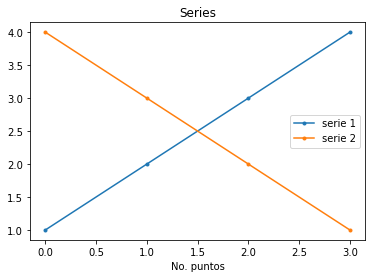

In [301]:
'''Generamos unas series muestra para ejemplificar la función'''

f_1 = np.arange(1,5) #La serie 1 es una secuencia de puntos unitarios del 1 al 5
g_1 = np.flip(f_1) #La serie 2 es la misma secuencia pero de forma inversa
plt.plot(f_1,'.-',label='serie 1') 
plt.plot(g_1,'.-',label='serie 2')
plt.legend()
plt.title('Series')
plt.xlabel('No. puntos')
plt.show()

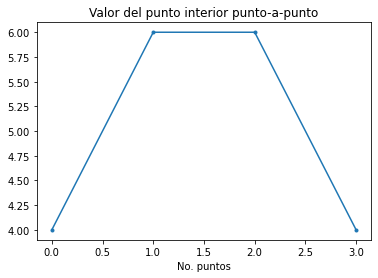

True

In [302]:
'''Ahora graficamos como se ve la operación punto a punto donde si nosotros "integramos" el área bajo la curva
o mejor dicho, sumamos todos los puntos notaremos que obtenemos el resultado de nuestra función'''

p_interior1 = p_interior(f_1,g_1) #Calculamos el punto interior con nuestra función
plt.plot(f_1*g_1,'.-')
plt.title('Valor del punto interior punto-a-punto')
plt.xlabel('No. puntos')
plt.show()

(f_1*g_1).sum()==p_interior1 #Comprobamos que nuestra función arroja el mismo resultado. 

#### La convolución

La segunda de las operaciones fundamentales sobre la que reposa la WCT, es la convolución, la cual podemos entender en palabras simples como un operador que toma dos funciones y regresa una tercera función que cuenta con los elementos de ambas funciones ya que representa la magnitud en la que se superpone la primera función y la segunda función invertida y trasladada. Matemáticamente en el espacio de funciones continuas se expresa para dadas funciones $f$ y $g$ como: 

$$ f(t)\star g(t) = \int_{-\infty}^{\infty} f(\tau)g(t-\tau) d\tau$$

Al igual que el producto interior, podemos traspasar la definición de la convolución al caso discreto, sean dos series $f_n$ y $g_n$ con $n$ puntos, la convolución se define como: 

$$f_n \star g_n = f[n]\star g[n] = \sum_{j=1}^{n} f[j]g[n-j]$$ 

###### Convolución en el dominio del tiempo 

Otra forma de visualizar a la convolución es como una forma iterativa de realizar el producto interior entre la primera función y la segunda función en corrimiento, es decir, realizar el producto interior entre la función $f(t)$ y cada una de las funciones $g(\tau) = g(t-\tau)$ para los valores $\tau$ dentro de un intervalo,
el cual usualmente es el dominio de la función $g$ o un sub-conjunto de éste. En la animación podemos visualizar esta descripción, donde cada frame de la misma representa el producto interior entre la función $f$ (función de respuesta de un capacitor) y la función $g$ (función de un pulso cuadrado) que se va recorriendo de acuerdo a un valor $\tau$, el resultado de estas operaciones se va graficando en la parte de abajo [1].

![Convolucion gif](https://upload.wikimedia.org/wikipedia/commons/4/42/Convolucion_de_entrada_con_respuesta_al_impulso.gif)

Una anotación importante, la cual se describirá más a fondo más a delante, es el hecho  que se suele emplear funciones $g$ de un cierto tipo, llamadas funciones de soporte compacto, que no es otra cosa que funciones que se encuentran acotadas dentro de un sub-conjunto finito (llamado soporte) $X$ de su dominio $\mathcal{D}$ tal que $X \subset \mathcal{D}$, donde sus valores son distintos de 0; fuera de este sub-conjunto la función es 0, dicho de otra forma, en una función de soporte compacto existe un intervalo finito y acotado de valores para los cuales la función es distinta de 0. Ésta cualidad tomará relevancia cuando se describan las características de las onduletas o wavelets.

Un detalle importante que debemos detallar sobre la convolución en el caso discreto, es la relación que existe entre las longitudes de las series $f_n$ de longitud $n$ y $g_m$ $m$ y su resultado de la convolución. Dada la naturaleza de la operación la serie resultante de la convolución tendrá un mayor o menor número de puntos que la serie $f_n$. En el primer caso, si se decie comenzar a realizar los productos interiores entre ambas series de tal forma que el primer punto de la serie $f_n$ coincida con el último punto de la serie $g_n$, entonces el resultado de la convolución tendrá una longitud menor a $n$ por la naturaleza del producto interior donde se concentra información de longitud $m$ (del producto interior de una sección de la serie $f_n$ con la serie $g_m$ que se desplaza) en un solo valor, el resultado de la operación. Elegir esta opción, no es viable para realizar los análisis ya que se obtiene muy poca información temporal de la serie $f_n$. La alternativa a esta problemática es elegir comenzar la convolución de tal forma que el primer punto de la serie $f_n$ coincida con la de la serie $g_m$ (como se observa en la figura); sin embargo, para poder realizar este arreglo y poder calcular un producto interior válido es necesario realizar un paso previo que consiste en ancamar a la serie $f_n$, es decir añadir un número de valores igual a 0 al comienzo y al final, el número de valores añadidos $k$ está en función de $m$, tal que $k = \lceil m/2 \rceil$ donde $\lceil * \rceil$ denota a la función piso. Con esto mente, realizamos la convolución habitualmente y obtendremos que la longitud del resultado $r_p$ será de longitud $p = n+m-1$, es posible recortar esta serie $r_p$ para recuperar la longitud de $f_n$. Realizando la convolución de esta manera maximizamos la información temporal adquirida.

![Ejemplo convolución](conv.png)

Con la definición de la convolución discreta en el dominio del tiempo, de igual forma es sencillo definir una función en Python que realice esta operación aprovechando la función para calcular el producto interior previamente definida, como sigue:

In [331]:
def conv_tiempo(f,g): #Definimos nuestra función para dos arrays f y g  
    n,m = len(f),len(g) #Obtenemos las longitudes de las series
    k = int(m/2) #Obtenemos el número de elementos a añadir en f para el encamado
    '''Encamado de la serie f'''
    f_pad = np.pad(f,(k,k),'constant') #Encamamos la serie usando el módulo de numpy pad()
    #El primer parámetro es el array a encamar, el segundo es la longitud de puntos a añadir al inicio 
    #y al final (k,k), el último parámetro indica que los valores serán constantes igual a 0
    '''Proceso de convolución'''
    p=n+m-1 #Longitud del resultado de la convolución
    conv = np.zeros(p) #Definimos el array donde se almacenarán los resultados de los productos punto
    for ti in range(len(f_pad)-m): #Establecemos el ciclo iterativo para los productos interiores
        f_temp = f_pad[ti:ti+m] #Extraemos el segmento de la serie f correspondiente
        g_temp = np.flip(g) #Invertimos la serie g 
        conv[ti+k] = p_interior(f_temp,g_temp) #Realizamos el producto interior y lo almacenamos
    '''Recortado del resultado'''
    conv_cut = conv[k:-k+1]
    return conv_cut

Para probar nuestra función de convolución en el tiempo, emplearemos la serie de EEG y un pulso cuadrado:

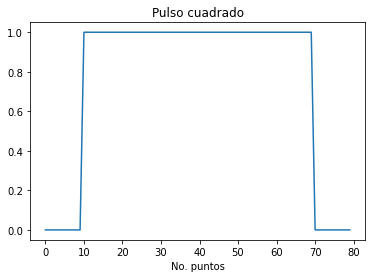

In [332]:
def cuadrado(m): #Función para crear una serie de pulso cuadrado con longitud m 
    pulso = np.ones(m) #Definimos que el pulso tendrá m número de unos
    pulso = np.pad(pulso,(10,10),'constant') #Establecemos que el pulso tendrá 10 valores 0 a los costados
    return pulso
pulso_c = cuadrado(60)
plt.plot(pulso_c)
plt.title('Pulso cuadrado')
plt.xlabel('No. puntos')
plt.show()

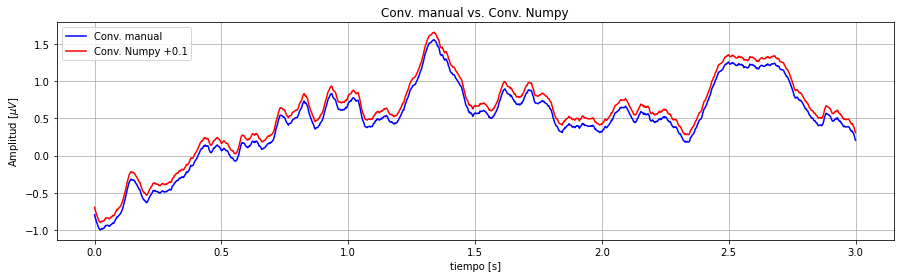

array([1., 1., 1., ..., 1., 1., 1.])

In [508]:
conv_1 = conv_tiempo(EEG,pulso_c/pulso_c.max())
conv_1_py = np.convolve(EEG,pulso_c/pulso_c.max(),mode='same')

fig, ax = plt.subplots(1,1,figsize=(15,4))
time=np.linspace(0,3,1500)
ax.plot(time,conv_1,'-',c='blue',label='Conv. manual')
ax.plot(time,conv_1_py+0.1,'-',c='red',label='Conv. Numpy +0.1')
ax.set_xlabel('tiempo [s]')
ax.set_ylabel(f'Amplitud [$\mu V$]')
ax.set_title('Conv. manual vs. Conv. Numpy')
ax.legend()
ax.grid()
plt.show()


#####  El teorema de la convolución 
    -- Convolución Rápida por medio del dominio de la frecuencia --

Hasta este punto hemos logrado definir e implementar la operación de convolución para dos series (señales) discretas mediante operaciones de producto interior iterativas, si bien este acercamiento es correcto existe una forma alternativa de obtener y visualizar a la convolución por medio del dominio de la frecuencia, para ello es necesario enunciar el *teorema de la convolución* que de forma sencilla describe que:

 > _"La convolución en un dominio corresponde a la multiplicación punto-a-punto en el dominio complementario"_

Matemáticamente se enuncia como:

$$f(t)\star g(t) = \mathcal{F}^{-1}\{F(\omega) \cdot G(\omega)\}$$

$$F(\omega)\star G(\omega) = \mathcal{F}\{f(t)\cdot g(t)\}$$

Con ésto podemos explicarlo usando palabras simples, la convolución en el dominio del tiempo es equivalente a la multiplicación en el dominio de la frecuencia. Apoyándonos de la imagen siguiente, si queremos realizar la convolución entre una señal $f$ y otra (kernel) $g$, de la manera usual, obtenemos la convolución por iteraciones de operaciones de producto interior; de la manera eficiente, calculamos la TF de cada una de las señales y posteriormente realizamos la multiplicación punto-a-punto de los espectros. Hasta este punto, si al resultado de la convolución obtenida convencionalmente calculamos su TF obtenendremos exactamente el mismo resultado que el obtenido hasta este punto de la convolución eficiente (elementos señalados como & en la imagen), por lo tanto el paso final es obtener la TFI de este resultado el es numéricamente identico al de la convolución convencional (elementos señalados como * en la imagen).

![Métodos de convolución](conv2.png)

Esta forma de calcular la convolución puede parecer más complicada y con más operaciones que la forma convencional y es que lo es al tener que llevar más operaciones intermedias, sin embargo esta modalidad es la forma principal en la que se calcula la convolución temporal entre dos series ya que es la forma más eficiente de hacerlo. La razón por la cual este método es el más eficiente recae en la efectividad del algoritmo para calcular las TF e TFI que es la transformada rápida de  Fourier FFT. Podemos corroborarlo implementando esta nueva forma de convolucionar series y comparar el tiempo de cómputo con la manera convencional previamente definida.

In [373]:
def conv_v2(f,g): #Definimos la función para dos arrays f y g
    'Realizamos un padding a las series para que tengan el mismo número de puntos que el del resultado de la conv. n+m-1'
    n,m =len(f),len(g)
    f_pad = np.pad(f,(0,m-1),'constant')
    g_pad = np.pad(g,(0,n-1),'constant')
    #En ambos casos añadimos puntos para que al final la longitud de ambas series sea igual a p=n+m-1
    '''Cambio al dominio de la frecuencia por FFT1'''
    f_fft = np.fft.fft(f_pad)
    g_fft = np.fft.fft(g_pad)
    g_fft = g_fft/g_fft.max() #Normalizamos el espectro de g para conservar las unidades de f en la convolución
    '''Teorema de la convolución'''
    conv = np.multiply(f_fft,g_fft)
    conv_res = np.fft.ifft(conv)
    '''Recorte del resultado para que tenga longitud n'''
    k = int(len(g)/2)
    conv_res = abs(conv_res[k:-k+1])
    return conv_res

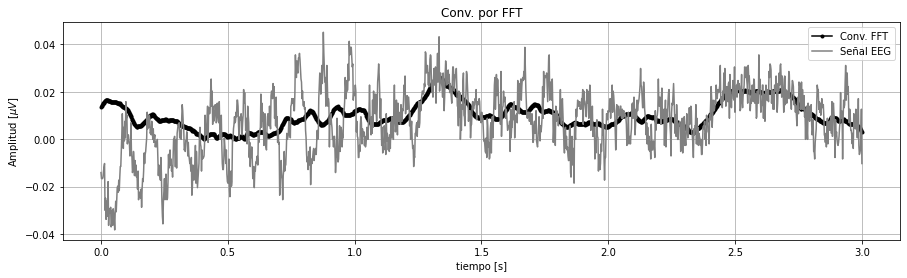

In [384]:
conv_2= conv_v2(EEG,pulso_c)
type(conv_2)
fig, ax = plt.subplots(1,1,figsize=(15,4))
time=np.linspace(0,3,1500)
ax.plot(time,conv_2,'.-',c='black',label='Conv. FFT')
ax.plot(time,EEG,'-',c='gray',label='Señal EEG')
ax.set_xlabel('tiempo [s]')
ax.set_ylabel(f'Amplitud [$\mu V$]')
ax.set_title('Conv. por FFT')
ax.legend()
ax.grid()
plt.show()

Empleamos la paquetería _datetime_ para calcular el tiempo que le está tomando al ordenador entre una modalidad de convolución y la otra.

In [387]:
from datetime import datetime #importamos la paquetería datetime para obtener la hora exacta bajo comando
import re #importamos la paquetería para manipulación de strings

tin=datetime.now() #Obtenemos la hora al momento que inicia la operación
print('Tiempo @ inicio =',str(datetime.now())) #imprimimos el momento en que incia la operación
conv1_test = conv_tiempo(EEG,pulso_c/pulso_c.max())
tfin = datetime.now() #Obtenemos la hora al momento de terminar la operación 
print('Tiempo @ final =',str(datetime.now())) #Imprimimos el momento en que termina la operación
delta = tfin-tin #Obtenemos la diferencia de tiempo 
sec,milisec = re.findall('\d+',str(delta))[2],re.findall('\d+',str(delta))[3] #Le damos formado
print(f'La convolución convencional tomó {sec} sec con {milisec} milisec!')

Tiempo @ inicio = 2021-08-06 00:43:35.137379
Tiempo @ final = 2021-08-06 00:43:35.249389
La convolución convencional tomó 00 sec con 112010 milisec!


In [388]:
tin=datetime.now() 
print('Tiempo @ inicio =',str(datetime.now())) 
conv1_test = conv_v2(EEG,pulso_c/pulso_c.max())
tfin = datetime.now()  
print('Tiempo @ final =',str(datetime.now()))
delta = tfin-tin 
sec,milisec = re.findall('\d+',str(delta))[2],re.findall('\d+',str(delta))[3] 
print(f'La convolución eficiente tomó {sec} sec con {milisec} milisec!')

Tiempo @ inicio = 2021-08-06 00:44:29.477703
Tiempo @ final = 2021-08-06 00:44:29.485685
La convolución eficiente tomó 00 sec con 007982 milisec!


Como notamos con el ejemplo anterior, no solo se obtienen resultados idénticos partiendo del teorema de la convolución, sino que también se obtienen resultados con mucha mayor velocidad demostrando la eficiencia de esta modalidad. Esta eficiencia cobrará mucha mayor relevancia cuando se requiera realizar múltiples convoluciones iterativas como veremos más adelante.

###### La convolución como filtro

Partiendo de la segunda definición de la convolución a partir de su teorema podemos dar un nuevo entendimiento a la convolución más allá de "una combinación entre dos funciones" sino como un filtro. Este concepto de filtrado proviene del resultado de multiplicar punto-a-punto los espectros ya que del resultado de esta operación se obtendrá un nuevo espectro donde solo permanecerán las frecuencias que compartan ambas señales como podemos observar en las siguientes gráficas 

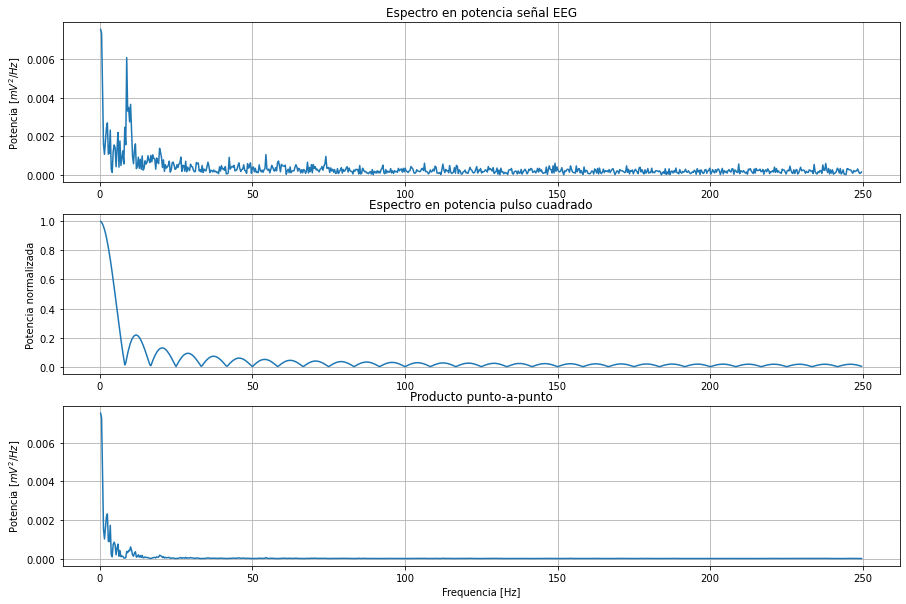

In [400]:
N,M =len(EEG),len(pulso_c)
f_pad = np.pad(EEG,(0,M-1),'constant')
g_pad = np.pad(pulso_c,(0,N-1),'constant')
P = N+M-1

signal_fft = sc.fft.fft(f_pad) 
T = 1.0/500 #Calculamos el periodo de la señal como el recíproco de la frecuencia de muestreo
signal_fft_abs = 2.0/P * np.abs(signal_fft[1:P//2]) #Normalizamos la transformada y eliminanos los valores resultantes de la paridad (freq. neg)

ker_fft = sc.fft.fft(g_pad)
ker_fft_abs = np.abs(ker_fft[1:P//2])
ker_fft_abs = ker_fft_abs/ker_fft_abs.max()

frequen = sc.fft.fftfreq(P,T)[1:P//2] #Construimos el vector de frecuencias para graficar las transformadas

fig,ax = plt.subplots(3,1,figsize=(15,10))


ax[0].plot(frequen,signal_fft_abs)
ax[0].set_ylabel('Potencia $[mV^2/Hz]$')
ax[0].set_title(f'Espectro en potencia señal EEG')
ax[0].grid()

ax[1].plot(frequen,ker_fft_abs)
ax[1].set_ylabel('Potencia normalizada')
ax[1].set_title(f'Espectro en potencia pulso cuadrado')
ax[1].grid()

conv = np.multiply(signal_fft_abs,ker_fft_abs)
ax[2].plot(frequen,conv)
ax[2].set_xlabel('Frequencia [Hz]')
ax[2].set_ylabel('Potencia $[mV^2/Hz]$')
ax[2].set_title(f'Producto punto-a-punto')
ax[2].grid()

Notamos como el producto de la multiplicación _filtra_ el espectro de la señal EEG, en el sentido que solo se conservan las potencias cuyas frecuencias coinciden con las del espectro del pulso cuadrado. Esta forma de idealizar el concepto de la convolución, así como la forma práctica sobre como obtenerla será de gran utilidad para la transformada wavelet.

### Descomposición Wavelet

Llegado a este punto, es el momento de hablar de la descomposición Wavelet, el concepto principal y la idea a desarrollar para definir la Transformada Contínua Wavelet. En esencia, la descomposicón o análisis wavelet conserva las ideas sobre la transformada de Fourier, ya que de manera similar, proyectamos nuestra señal (o función) sobre una base ortogonal, es decir calculamos el producto interior de una función con una base o kernel. La diferencia con la TF será que no solo se modificará el tipo de kernel empleado sino que ya no se tratará de un kernel "único" como lo era el caso con las funciones trigonométricas en su forma $e^{i2\pi \omega t}$ sino que en la doscomposicón Wavelet se tentra una familia de kernels derivados a partir de una función base, ésta función base se le conoce como __*Wavelet Madre*__.

Algunas de las ventajas de la descomposición Wavelet sobre la TF convencional incluyen:

    - Emplear una ventana temporal variable
    - Contar con una resolución tiempo-frecuencia óptima para los distintos rangos de frecuencia
    - No requerir estacionariedad estricta en la señal gracias a sus ventanas adaptables

### Wavelets - los kernels

Como se mencionó, la descomposición Wavelet consiste en la proyección de una señal sobre un conjunto o familia de kernels derivados de una función base conocida como wavelet madre, es esta wavelet madre la que definirá las características extraidas de la señal a analizar a partir de la descomposición ya que en la actualidad cada tipo distinto de wavelet madre tiene una aplicación en un estudio particular. En general, no existe un conjunto definido sobre todas las wavelet madre, ya que cualquiera puede definir su propia función base, sin embargo ésta debe cumplir con las siguientes características, sea $\Psi(t)$ la función base:

* 1. Contar con soporte compacto, es decir, que se encuentre localizada en un intervalo finito y sea cero fuera de éste.
* 2. Integrar a 0 en todo el espacio $$\int_{-\infty}^{\infty} \Psi(t) dt = 0$$
* 3. $$\int_{-\infty}^{\infty} ||\Psi(t)|| dt = 1$$
* 4. Formar una base ortogonal, es decir, que cumplan con la relación de ortoganalidad

$$<\Psi_{m,n} \Psi_{s,t}> = \int_{-\infty}^{\infty} \Psi_{m,n}(t) \bar{\Psi_{s,t}}(t) dt = \delta_{m,s}\delta_{n,t}$$

Además de estas propiedades fundamentales, si deseamos en particular que de nuestra descomposición podamos extraer información acercade de la amplitud y de la fase de la representación espectro-temporal, la wavelet $\Psi (t)$  necesita ser una función evaluada por números complejos y tener buena localización temporal y espectral, es decir tener un soporte compacto definido y bajo en su representación temporal y frecuencial, el cual estará relacionado con la resolución en estos dominios. Una opción que cumple con estos requisitos y que ha sido comunmente utilizada para el análisis de señales de EEG es la Wavelet de Morlett.

##### Wavelet de Morlett

La wavelet de Morlett se define como el producto de una oscilación compleja con una frecuencia fija por una ventana gaussiana; su primer elemento le otorga una localización frecuencial dada su frecuencia fija, mientras que el segundo le asigna una localización temporal bien definida. Ambos elementos de su construcción pueden ser parametrizados para la generación de la familia de kernels a emplear. Matemáticamente se define para una frecuencia $\omega_0$ y una desviación estandar temporal $\sigma_t$ como parámetros:

$$\Psi_{\omega_{0},\sigma_t}(t) = A(\sigma_t)e^{-\frac{t^2}{2\sigma_{t}^{2}}}e^{i2\pi\omega_{0}t}$$

donde el coeficiente dependiente de $\sigma_t$ se define como:

$$A(\sigma_t) = \frac{1}{\sqrt{\sigma_t\sqrt{\pi}}} $$

El cual permite asegurar que la energía de la wavelet será igual a 1, es decir es un factor de normalización y permite que se cumpla la propiedad 3.

A su vez, es posible reparametrizar el valor de $\sigma_t$ como:

$$\sigma_t(\omega_0) = \frac{n_c}{2\pi\omega_0} $$

definiendo un nuevo parámetro $n_c \in \mathbb{R}^{+}$ como el valor de determina el número aproximado de ciclos de oscilación dada la frecuencia $\omega_0$ que ocurren dentro de la campana Gaussiana, es decir este parámetro se asociará a la ventana temporal de la wavelet. 

A continuación definiremos una función para generar una wavelt de Morlett y su visualización en el campo real e imaginario.

In [503]:
'''Definimos la función que generará al conjunto de wavelets, dados los parámetros de frecuencia y n_c para una 
para un vector de tiempo y una frecuencia de muestreo que debe ser la misma que la de nuestra señal 
en este caso 500 mps'''
def morlet(fw,n_c,twav,freqm=500): 
    #Componente oscilatoria 'Seno complejo'
    com_sin = np.exp(1j*2*np.pi*fw*twav)
    #Ventana de Gauss
    sigma = n_c/(2*np.pi*fw)
    gauss_c = np.exp(-twav**2/(2*sigma**2))
    #Normalization
    A_sigma = 1/(np.sqrt(sigma*np.sqrt(np.pi)))
    #Morlet wavelet
    wavelet = A_sigma*com_sin*gauss_c
    return wavelet

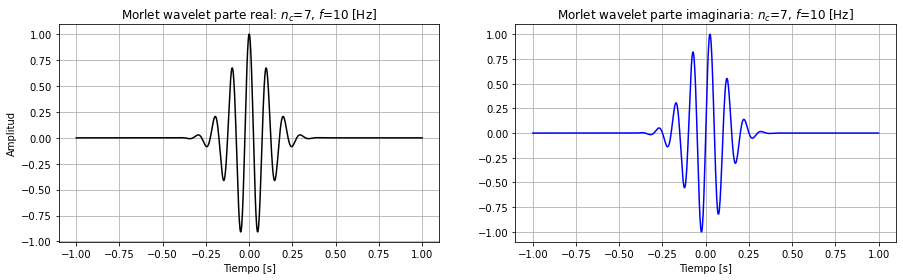

In [505]:
fig,ax = plt.subplots(1,2,figsize=(15,4))

frec_wav = 10 #frecuencia de oscilación
n_c = 7 #número de ciclos
twav = np.linspace(-1,1,500*2) #La elección de una ventana simétrica centrada en 0 permite que se obtenga una wavelet con número de puntos impares

wavelet = morlet(frec_wav,n_c,twav)

w_real = np.real(wavelet)/np.real(wavelet).max()
ax[0].plot(twav, w_real,'black')
ax[0].set_xlabel('Tiempo [s]')
ax[0].set_ylabel('Amplitud')
ax[0].set_title(f'Morlet wavelet parte real: $n_c$={n_c}, $f$={frec_wav} [Hz]')
ax[0].grid()

w_imag = np.imag(wavelet)/np.imag(wavelet).max()
ax[1].plot(twav, w_imag,'blue')
ax[1].set_xlabel('Tiempo [s]')
ax[1].set_title(f'Morlet wavelet parte imaginaria: $n_c$={n_c}, $f$={frec_wav} [Hz]')
ax[1].grid()


plt.show()

Notamos que la representación imaginaria de la wavelet tiene un desfase de 90° con respecto a la real, esto es meramente derivado de su definición ya que la parte real oscilatoria corresponde a la función $cos$ mientras que la imaginaria a la función $sen$, véase la relación de Euler:

$$e^{i\theta} = cos(\theta) + isen(\theta)$$

La principal ventaja de emplear la wavelet de Morlet para análisis tiempo-frecuencia, es su clara localización temporal, definida por la ventana gaussiana en el parámetro $n_c$, y su localización espectral bien definida ya que la wavelet de Morlet se representa como una campana de Gauss en el dominio de la frecuencia.

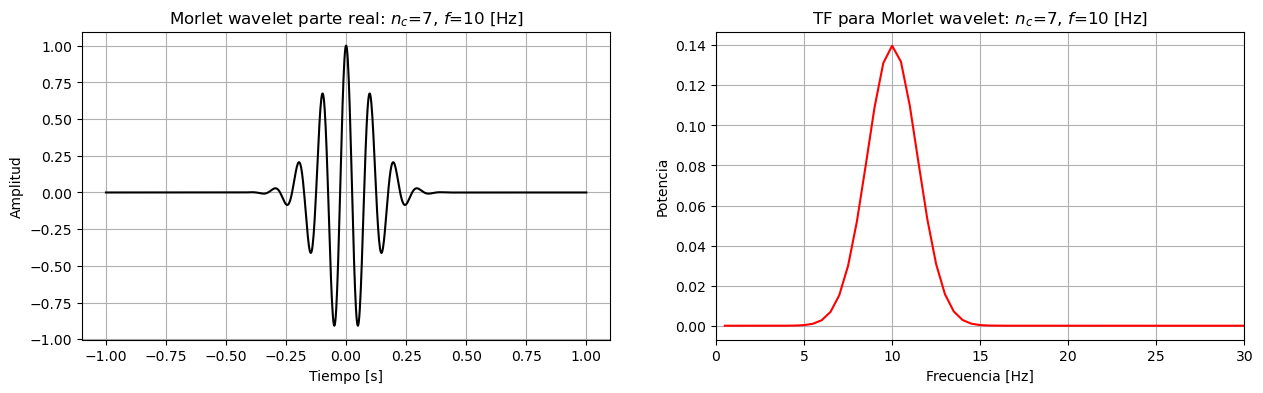

In [617]:
fig,ax = plt.subplots(1,2,figsize=(15,4))

frec_wav = 10 #frecuencia de oscilación
n_c = 7 #número de ciclos
twav = np.linspace(-1,1,500*2) #La elección de una ventana simétrica centrada en 0 permite que se obtenga una wavelet con número de puntos impares

wavelet = morlet(10,n_c,twav)

w_real = np.real(wavelet)/np.real(wavelet).max()
ax[0].plot(twav, w_real,'black')
ax[0].set_xlabel('Tiempo [s]')
ax[0].set_ylabel('Amplitud')
ax[0].set_title(f'Morlet wavelet parte real: $n_c$={n_c}, $f$={frec_wav} [Hz]')
ax[0].grid()

"""Calculo de FFT para la wavelet"""
N = len(w_real)
T = 1/500
w_fft = sc.fft.fft(w_real)
w_fft = 2.0/N * abs(w_fft[1:N//2])
fwav = sc.fft.fftfreq(N,T)[1:N//2]
ax[1].plot(fwav, w_fft,'red')
ax[1].set_xlabel('Frecuencia [Hz]')
ax[1].set_ylabel('Potencia')
ax[1].set_xlim(0,30)
ax[1].set_title(f'TF para Morlet wavelet: $n_c$={n_c}, $f$={frec_wav} [Hz] ')
ax[1].grid()

plt.show()

Este beneficio permitirá filtrar a nuestra señal de interés con una forma gaussiana, la cual cuenta con una anchura ajustable de acuerdo al parámetro $n_c$, se detallará este aspecto más adelante. La segunda ventaja de emplear este tipo de wavelet es que no presenta bordes afilados, es decir es una función suave lo cual minimizará efectos de rizado en la representación espectro-temporal los cuales pueden llegarse a confundir con oscilaciones propias de la señal; un artefacto común de estas metodologías de análisis tiempo-frecuencia al usar kernels de convolución cuyas representaciones frecuenciales tienen formas planas y con bordes afilados. 

##### Parámetro $n_c$

Como vimos, es posible delimitar la ventana gaussiana ajustando el parámetro $n_c$, lo cual tendrá un impacto en las precisiones temporales y frecuenciales de la transformación, ya que una ventana gaussiana mayor conlleva a una disminución en la precisión temporal (el soporte de la wavelet es mayor lo que conduce a una convolución con mayor número de puntos con la señal en el tiempo); sin embargo, esto conducirá a un aumento en la precisión frecuencial (la anchura del espectro de la wavelet se reducirá permitiendo un "filtrado" más preciso alrededor de la frecuencia fundamental de la wavelet). Estos efectos ocurren de forma inversa de tal forma que una mayor precisión temporal coonlleva a una menor resolución frecuencial. Los detalles de estos resultados se detallarán en la siguiente parte cuando hondemos acerca del __*Principio de incertidumbre de Gabor*__. Dada la importancia del parámetro $n_c$, éste siempre es reportado en los trabajos donde se emplee esta técnica de análisis tiempo-frecuencia y usualmente toma valores entre 2 a 15 para frecuencias entre 2 y 80 [Hz] de acuerdo con (Cohen, 2018). A continuación se presenta el efecto de modificar ambos parámetros de la wavelet madre:

In [579]:
def gauss(twav,n_c,fw):
    #Ventana de Gauss
    sigma = n_c/(2*np.pi*fw)
    gauss_c = np.exp(-twav**2/(2*sigma**2))
    #Normalization
    A_sigma = 1/(np.sqrt(sigma*np.sqrt(np.pi)))
    return gauss_c*A_sigma

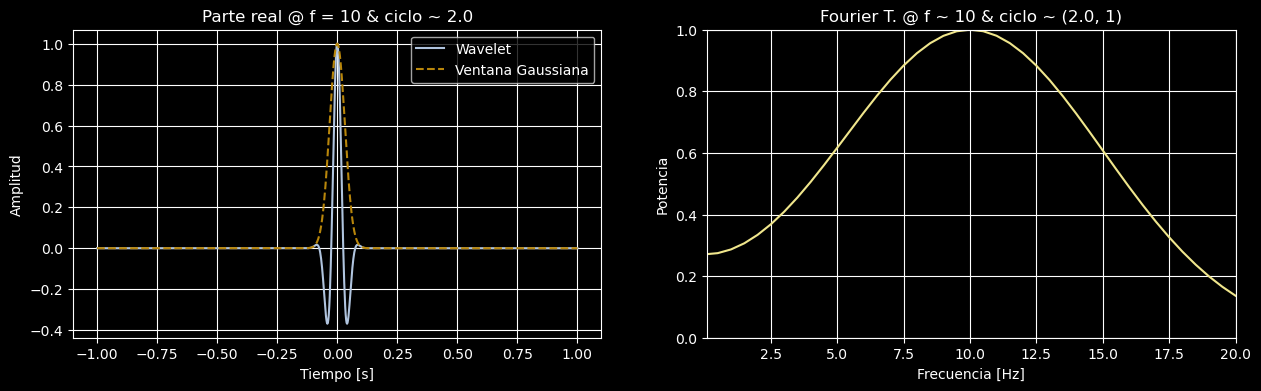

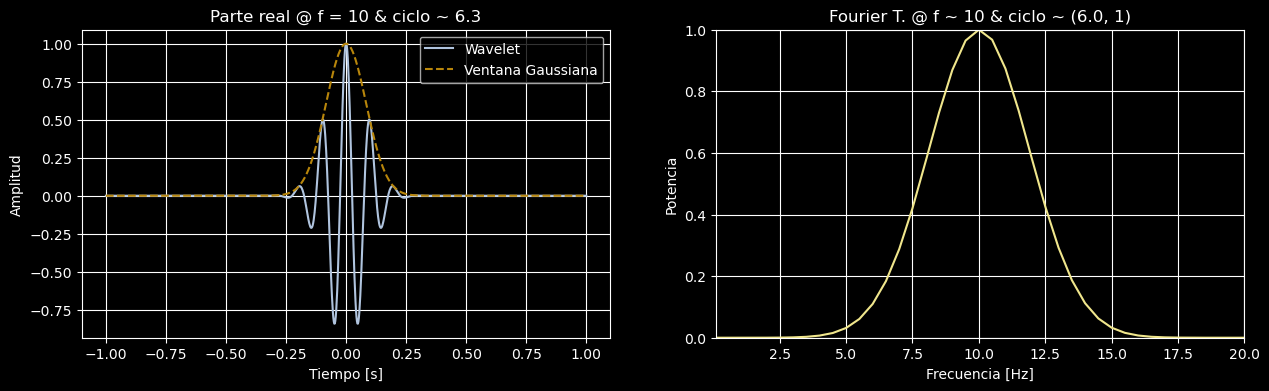

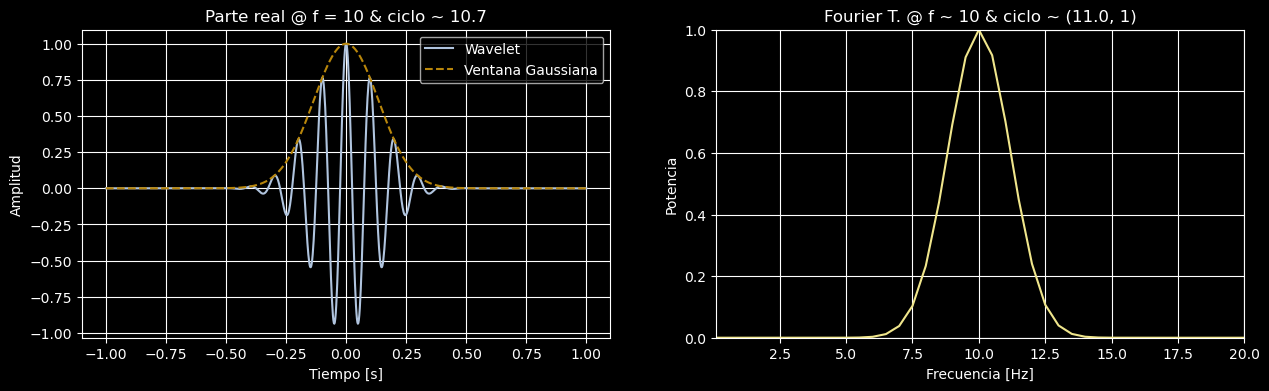

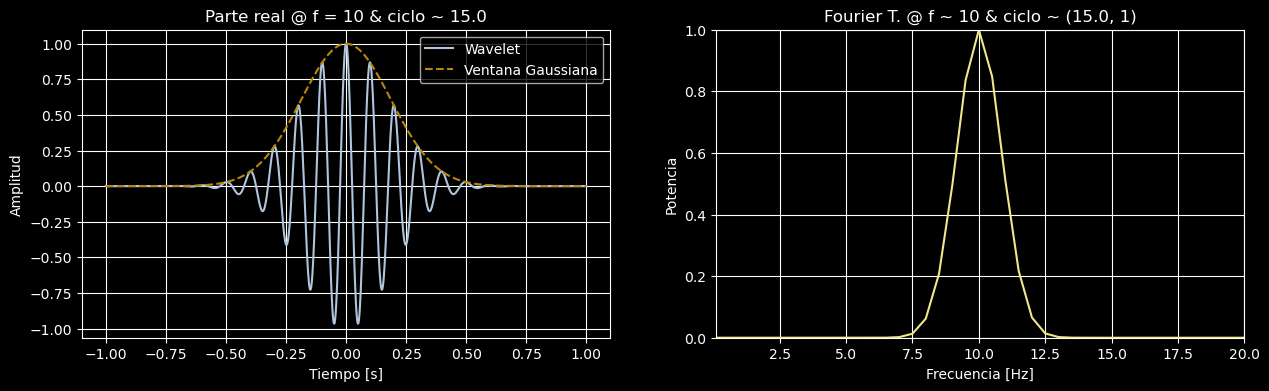

In [620]:
'''1.- número de ciclos variable, a una frecuencia fija'''
p = 5 #Número de elementos a generar 
n_i = 2 #número de ciclo inicial
n_f = 15 #número de ciclo final
vec_cycles =np.linspace(n_i, n_f, p) #Vector de ciclos con inicio y final con p elementos lineal e igualmente separados
frec = 10 #Frecuencia fija
twav = np.linspace(-1,1,500*2)
N = len((morlet(frec,vec_cycles[0],twav)))
T = 1/500
fwav = sc.fft.fftfreq(N, T)[:N//2]
plt.style.use('dark_background')
for i in range(len(num_cycles)):
    fig,axs = plt.subplots(1,2,figsize=(15,4))
    gauss_f = gauss(twav,vec_cycles[i],frec)
    gauss_f = gauss_f/gauss_f.max()
    wavelet = morlet(frec,vec_cycles[i],twav)
    w_real = np.real(wavelet)/np.real(wavelet).max()
    axs[0].plot(twav, w_real,c='lightsteelblue',label='Wavelet')
    axs[0].plot(twav,gauss_f,'--',c='darkgoldenrod',label='Ventana Gaussiana')
    axs[0].set_title(f'Parte real @ f = {frec} & ciclo ~ {np.round(num_cycles[i],1)}') 
    axs[0].set_ylabel('Amplitud')
    axs[0].set_xlabel('Tiempo [s]')
    axs[0].legend()
    
    w_fft=sc.fft.fft(w_real)
    w_fft = abs(w_fft)/abs(w_fft).max()
    axs[1].plot(fwav,abs(w_fft[0:N//2]) ,'khaki')
    axs[1].set_title(f'Fourier T. @ f ~ {frec} & ciclo ~ {np.round(num_cycles[i]),1}') 
    axs[1].set_ylabel('Potencia')
    axs[1].set_xlabel('Frecuencia [Hz]')
    axs[1].set_xlim([0.1,frec*2])
    axs[1].set_ylim([0,1])
    axs[0].grid()
    axs[1].grid()
plt.show()
plt.style.use('default')

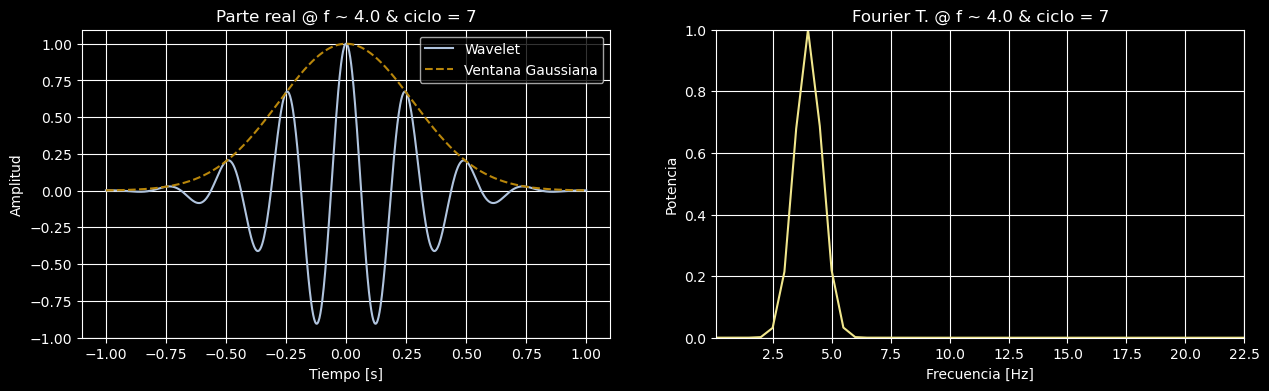

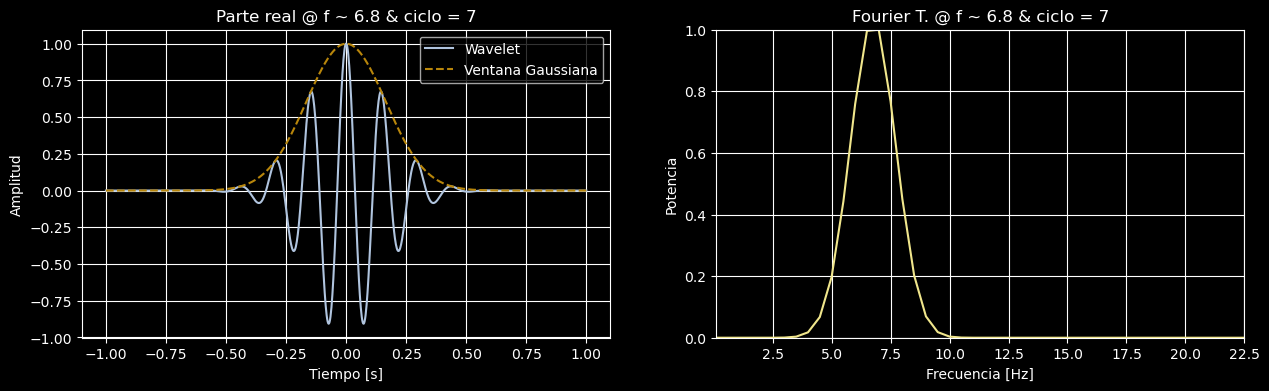

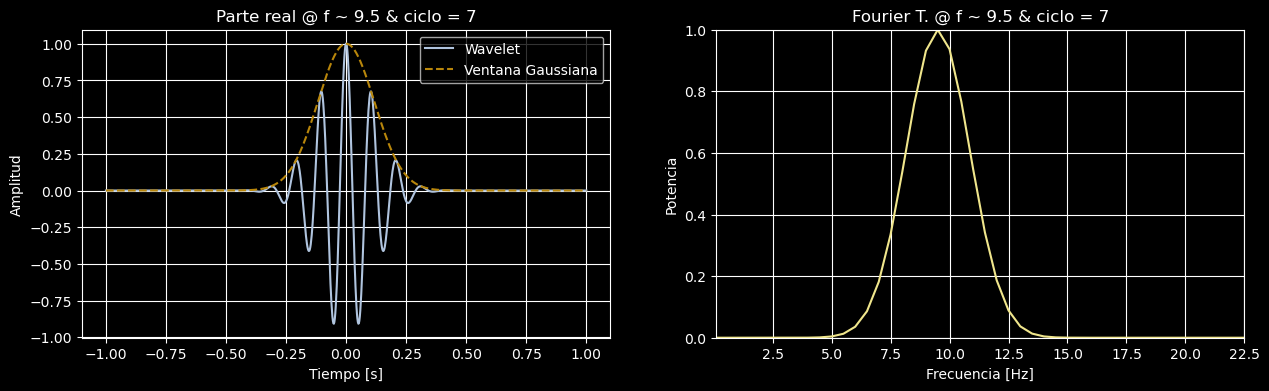

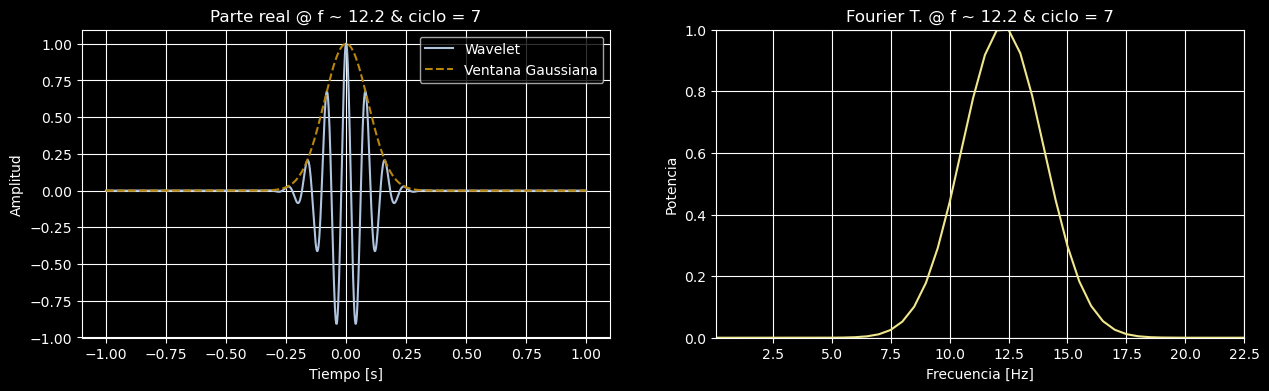

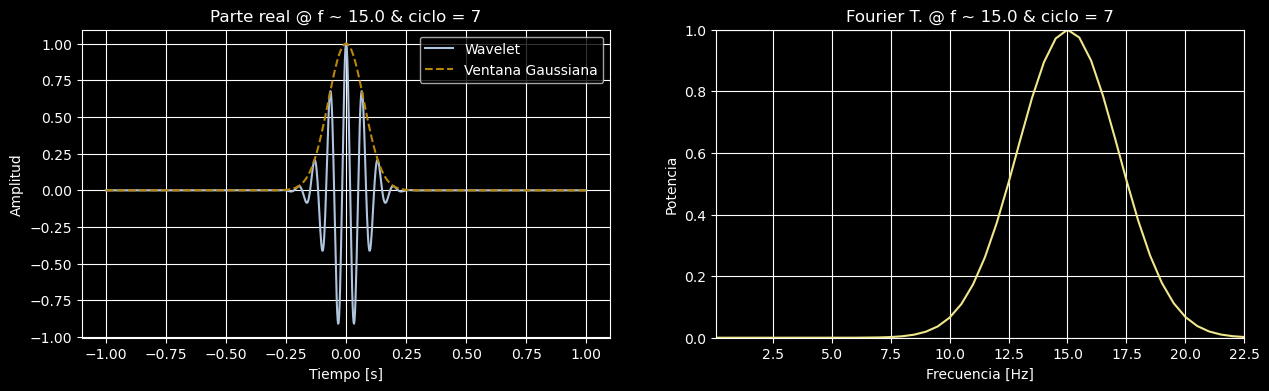

In [619]:
'''2.- frecuencia variable, a un número de ciclos fijo'''
p = 5#Número de elementos a generar
fi = 4 #Valor inicial para la frecuencia
ff = 15 #Valor final para la frecuencia
v_frec = np.linspace(fi,ff,p) #Vector de frecuencias con p elementos lineal e igualmente espaciados
n_c = 7 #no. de ciclos fijo
twav = np.linspace(-1,1,500*2)
N = len((morlet(v_frec[0],n_c,twav)))
T = 1/500
fwav = sc.fft.fftfreq(N, T)[:N//2]
plt.style.use('dark_background')
for i in range(len(v_frec)):
    fig,axs = plt.subplots(1,2,figsize=(15,4))
    wavelet = morlet(v_frec[i],n_c,twav)
    w_real = np.real(wavelet)/np.real(wavelet).max()
    gauss_f = gauss(twav,n_c,v_frec[i])
    gauss_f = gauss_f/gauss_f.max()
    axs[0].plot(twav, w_real,c='lightsteelblue',label='Wavelet')
    axs[0].plot(twav,gauss_f,'--',c='darkgoldenrod',label='Ventana Gaussiana')
    axs[0].set_title(f'Parte real @ f ~ {np.round(v_frec[i],1)} & ciclo = {n_c}') 
    axs[0].set_ylabel('Amplitud')
    axs[0].set_xlabel('Tiempo [s]')
    axs[0].legend()
    
    w_fft=sc.fft.fft(w_real)
    w_fft = abs(w_fft)/abs(w_fft).max()
    axs[1].plot(fwav,abs(w_fft[0:N//2]) ,'Khaki')
    axs[1].set_title(f'Fourier T. @ f ~ {np.round(v_frec[i],1)} & ciclo = {n_c}') 
    axs[1].set_ylabel('Potencia')
    axs[1].set_xlabel('Frecuencia [Hz]')
    axs[1].set_xlim([0.1,ff*1.5])
    axs[1].set_ylim([0,1])
    axs[0].grid()
    axs[1].grid()
plt.show()
plt.style.use('default')

Como se aprecia en las gráficas, al modificar tanto el parámetro $n_c$ como la frecuencia definida de la wavelet, la ventana temporal y espectral sufen cambios (alteraciones en la precisión temporal y espectral); la manipulación y calibración de éstos parámetros serán de utilidad en el siguiente módulo para la generación del análisis multiresolución.

### Transformada Contínua Wavelet

Finalmente, podemos definir a la Transformada Contínua Wavelet como una serie de 3 pasos:

    1.- Obtener la convolución en el tiempo de la señal de interés con la wavelet a analizar.
    2.- Variar los parámetros de la wavelet madre para obtener una familia de kernels.
    3.- Iterar el proceso de convolución para cada elemento de la familia.

Ahora resulta importante discutir cual es el resultado de la transformación con el kernel complejo con la señal con valores reales, pues bien el resultado naturalmente será una función compleja $\mathcal{X}(t,f)$ cuyas variables son $t$ el tiempo y $f$ la frecuencia la cual es la representación espectro-temporal que buscábamos al comienzo. Al ser una función compleja ésta puede expresarse como:

$$\mathcal{X}(t,f) = ||\mathcal{X}(t,f)||e^{i\theta(t,f)}$$

De manera gráfica, el proceso de transformación se resume como:

![Transformada Contínua Wavelet](twc.png)

La implementación de esta transformación se discutirá a profundidad en el siguiente bloque.

### Referencias
    1.- Cassani, R., & Falk, T. H. (2018). Spectrotemporal modeling of biomedical signals: Theoretical foundation and applications. Reference Module in Biomedical Sciences. Elsevier.
    2.- Cohen, M. X. (2019). A better way to define and describe Morlet wavelets for time-frequency analysis. NeuroImage, 199, 81-86.
    3.- Kutz, J. N.[Nathan Kutz] (2018,mayo 10). Time Frequency Analysis & Wavelets [Archivo de video] Recuperado de: https://www.youtube.com/watch?v=ViZYXxuxUKA&ab_channel=NathanKutz 
    4.- Schiff, S. J., Aldroubi, A., Unser, M., & Sato, S. (1994). Fast wavelet transformation of EEG. Electroencephalography and clinical neurophysiology, 91(6), 442-455. 
    5.- Rioul, O., & Vetterli, M. (1991). Wavelets and signal processing. IEEE signal processing magazine, 8(4), 14-38.